Simple

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/MSc_stroke_incidence.csv')

# Group data by 'id' to keep all records of a patient together
grouped_df = df.groupby('id')

# Extract the unique patient ids
unique_ids = df['id'].unique()

# Split the unique patient ids into train (80%), validation (10%), and test (10%)
train_ids, temp_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

# Create the train, validation, and test sets by selecting records based on the patient ids
train_set = df[df['id'].isin(train_ids)]
val_set = df[df['id'].isin(val_ids)]
test_set = df[df['id'].isin(test_ids)]

# Output some basic stats
print(f"Training set: {len(train_set)} samples, {len(train_ids)} unique patients")
print(f"Validation set: {len(val_set)} samples, {len(val_ids)} unique patients")
print(f"Test set: {len(test_set)} samples, {len(test_ids)} unique patients")

Training set: 13462 samples, 3268 unique patients
Validation set: 1540 samples, 409 unique patients
Test set: 1435 samples, 409 unique patients


More complex with scoring based on proportion of multiple splits

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
df = pd.read_csv('/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/MSc_stroke_incidence.csv')

# Desired proportions
train_prop = 0.8
val_prop = 0.1
test_prop = 0.1

# Function to evaluate the balance of stroke labels and the proportion of set sizes
def evaluate_split(train_set, val_set, test_set, total_size):
    # Calculate stroke label distribution in each set
    train_balance = train_set['stroke_5y'].mean()
    val_balance = val_set['stroke_5y'].mean()
    test_balance = test_set['stroke_5y'].mean()
    
    # Calculate the proportions of each set
    train_size_prop = len(train_set) / total_size
    val_size_prop = len(val_set) / total_size
    test_size_prop = len(test_set) / total_size
    
    # Calculate the absolute difference in proportions
    size_diff = abs(train_size_prop - train_prop) + abs(val_size_prop - val_prop) + abs(test_size_prop - test_prop)
    
    # Calculate the absolute difference in label proportions
    train_diff = abs(train_balance - 0.5)
    test_diff = abs(test_balance - 0.5)
    val_diff = abs(val_balance - 0.5)
    
    # Combine these metrics (class distribution and set size); lower score is better
    return size_diff + train_diff + test_diff + val_diff

# Store the best split and the best score
best_score = np.inf
best_split = None

# Run the split process multiple times
n_iterations = 10000
total_size = len(df)

for i in range(n_iterations):
    # Extract unique patient ids
    unique_ids = df['id'].unique()
    
    # Split the unique patient ids into train (80%), validation (10%), and test (10%)
    train_ids, temp_ids = train_test_split(unique_ids, test_size=0.2, random_state=i)  # Changing random_state
    val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=i)
    
    # Create the train, validation, and test sets
    train_set = df[df['id'].isin(train_ids)]
    val_set = df[df['id'].isin(val_ids)]
    test_set = df[df['id'].isin(test_ids)]
    
    # Evaluate the current split
    current_score = evaluate_split(train_set, val_set, test_set, total_size)
    
    # If this is the best split so far, save it
    if current_score < best_score:
        best_score = current_score
        best_split = (train_set, val_set, test_set)
    
    # print(f"Iteration {i+1}/{n_iterations}, Score: {current_score:.5f}")

# Retrieve the best train, validation, and test sets
train_set, val_set, test_set = best_split

# Calculate proportions and class distribution for the best split
def print_split_stats(train_set, val_set, test_set, total_size):
    train_size_prop = len(train_set) / total_size
    val_size_prop = len(val_set) / total_size
    test_size_prop = len(test_set) / total_size

    print("\nBest Split Statistics:")
    print(f"Train size: {len(train_set)} ({train_size_prop:.2%} of total)")
    print(f"Validation size: {len(val_set)} ({val_size_prop:.2%} of total)")
    print(f"Test size: {len(test_set)} ({test_size_prop:.2%} of total)")
    
    print(f"\nClass distribution (stroke_5y):")
    print(f"Train set positive rate: {train_set['stroke_5y'].mean():.5f}")
    print(f"Validation set positive rate: {val_set['stroke_5y'].mean():.5f}")
    print(f"Test set positive rate: {test_set['stroke_5y'].mean():.5f}")

# Print statistics for the best split
print_split_stats(train_set, val_set, test_set, total_size)


Iteration 1/10000, Score: 0.15644
Iteration 2/10000, Score: 0.11937
Iteration 3/10000, Score: 0.17090
Iteration 4/10000, Score: 0.09720
Iteration 5/10000, Score: 0.06901
Iteration 6/10000, Score: 0.13950
Iteration 7/10000, Score: 0.09448
Iteration 8/10000, Score: 0.14139
Iteration 9/10000, Score: 0.14889
Iteration 10/10000, Score: 0.15073
Iteration 11/10000, Score: 0.12570
Iteration 12/10000, Score: 0.07304
Iteration 13/10000, Score: 0.10348
Iteration 14/10000, Score: 0.18341
Iteration 15/10000, Score: 0.10951
Iteration 16/10000, Score: 0.11339
Iteration 17/10000, Score: 0.09178
Iteration 18/10000, Score: 0.16469
Iteration 19/10000, Score: 0.13714
Iteration 20/10000, Score: 0.13671
Iteration 21/10000, Score: 0.14847
Iteration 22/10000, Score: 0.09741
Iteration 23/10000, Score: 0.13146
Iteration 24/10000, Score: 0.13727
Iteration 25/10000, Score: 0.15245
Iteration 26/10000, Score: 0.24398
Iteration 27/10000, Score: 0.18241
Iteration 28/10000, Score: 0.11301
Iteration 29/10000, Score: 0.

In [12]:
display(train_set)

,id,age,sex,ethnicity,dm,htn,hardwareModelName,stroke_5y,img_path
0,87159,63,Male,White,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye09/AlzeyeProcessed/Alzeye_img_0...
1,118080,59,Male,Asian or Asian British,1,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...
2,193018,76,Male,White,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye03/AlzeyeProcessed/Alzeye_img_0...
3,55965,86,Female,White,1,0,3DOCT-2000SA,1,/SAN/ioo/Alzeye04/AlzeyeProcessed/Alzeye_img_0...
5,217733,84,Female,White,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...
...,...,...,...,...,...,...,...,...,...
16432,34777,75,Male,Black or Black British,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye04/AlzeyeProcessed/Alzeye_img_0...
16433,60133,81,Male,White,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye08/AlzeyeProcessed/Alzeye_img_0...
16434,175606,72,Female,Black or Black British,0,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye08/AlzeyeProcessed/Alzeye_img_0...
16435,7997,58,Male,Other Ethnic Groups,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...


In [16]:
# Function to update the image paths in a dataframe
def update_image_paths(df):
    df['img_path'] = df['img_path'].apply(lambda x: f"/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/{x.split('/')[-1]}")
    return df

# Update image paths in all splits
train_set = update_image_paths(train_set)
val_set = update_image_paths(val_set)
test_set = update_image_paths(test_set)

# Optionally, save the best split to CSV files
train_set.to_csv('/home/gbillenn/DissProj/Data/mainCSV/best_train_split.csv', index=False)
val_set.to_csv('/home/gbillenn/DissProj/Data/mainCSV/best_val_split.csv', index=False)
test_set.to_csv('/home/gbillenn/DissProj/Data/mainCSV/best_test_split.csv', index=False)

/home/gbillenn/DissProj/miniconda3/envs/retfoundNEW/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Validate

In [14]:
# Ensure that all IDs are unique across the train, validation, and test sets
def check_unique_ids(train_set, val_set, test_set):
    # Extract the unique patient IDs from each set
    train_ids = set(train_set['id'].unique())
    val_ids = set(val_set['id'].unique())
    test_ids = set(test_set['id'].unique())
    
    # Check for overlaps
    train_val_overlap = train_ids.intersection(val_ids)
    train_test_overlap = train_ids.intersection(test_ids)
    val_test_overlap = val_ids.intersection(test_ids)
    
    # Print results
    if not train_val_overlap and not train_test_overlap and not val_test_overlap:
        print("All sets have unique patient IDs. No overlaps found.")
    else:
        if train_val_overlap:
            print(f"Overlap found between train and validation sets: {train_val_overlap}")
        if train_test_overlap:
            print(f"Overlap found between train and test sets: {train_test_overlap}")
        if val_test_overlap:
            print(f"Overlap found between validation and test sets: {val_test_overlap}")

# Run the check
check_unique_ids(train_set, val_set, test_set)


All sets have unique patient IDs. No overlaps found.


## Check for bad images - corrupt or empty

In [2]:
import os
import pandas as pd
from PIL import Image

# Function to check if an image can be opened
def check_images(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    for idx, row in df.iterrows():
        img_path = row['img_path']

        # Check if the image exists
        if not os.path.exists(img_path):
            print(f"\nMissing image: {img_path} at index {idx}")
            # Uncomment below to remove the row if needed
            # df = df.drop(index)
            continue

        # Try to open the image and catch any exceptions
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verify if the image is valid
        except Exception as e:
            print(f"\nCorrupted or malformed image at {img_path} (index {idx}): {e}")
            # Uncomment below to remove the row if needed
            index = df.index
            print(f"old rows: {len(index)}")
            df = df.drop(idx)
            index = df.index
            print(f"new rows: {len(index)}")

    # Save the updated dataframe if you decide to remove bad records
    df.to_csv(csv_file, index=False)

# Example usage: Check all CSV files
print("Checking train_split.csv")
check_images('/home/gbillenn/DissProj/Data/mainCSV/filePathChanged/train_split.csv')
# Corrupted or malformed image at /home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg (index 10287): cannot identify image file '/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg'

print("\nChecking val_split.csv")
# check_images('/home/gbillenn/DissProj/Data/mainCSV/filePathChanged/val_split.csv')
print("\nChecking test_split.csv")
# check_images('/home/gbillenn/DissProj/Data/mainCSV/filePathChanged/test_split.csv')


Checking train_split.csv

Corrupted or malformed image at /home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg (index 10287): cannot identify image file '/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg'
old rows: 13192
new rows: 13191

Checking val_split.csv

Checking test_split.csv


# After Automorph - analyze the csv

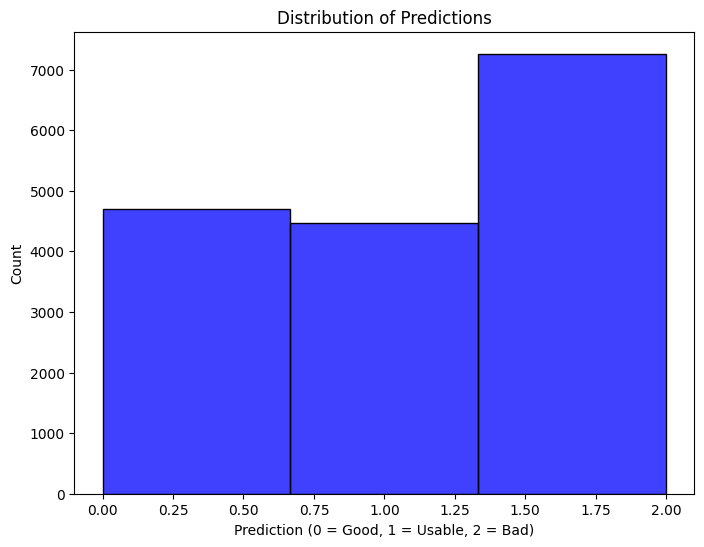

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Load the CSV file
df = pd.read_csv('/home/gbillenn/DissProj/AutoMorph/Results/M1/results_ensemble.csv')

# 1. Bar Plot of Average Softmax Values (good, usable, bad)
def plot_avg_softmax(df):
    avg_softmax = {
        'Good': df['softmax_good'].mean(),
        'Usable': df['softmax_usable'].mean(),
        'Bad': df['softmax_bad'].mean()
    }
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(avg_softmax.keys()), y=list(avg_softmax.values()), palette="Blues_d")
    plt.title('Average Softmax Scores')
    plt.ylabel('Softmax Score')
    plt.show()

# 2. Histogram of Predictions
def plot_prediction_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Prediction'], bins=3, kde=False, color='blue')
    plt.title('Distribution of Predictions')
    plt.xlabel('Prediction (0 = Good, 1 = Usable, 2 = Bad)')
    plt.ylabel('Count')
    plt.show()

# 3. Scatter Plot of Softmax Scores with Error Bars (Standard Deviation)
def plot_softmax_with_error(df):
    plt.figure(figsize=(10, 6))
    
    # Plot good with error bars
    plt.errorbar(df.index, df['softmax_good'], yerr=df['good_sd'], fmt='o', label='Good', color='green', alpha=0.6)
    
    # Plot usable with error bars
    plt.errorbar(df.index, df['softmax_usable'], yerr=df['usable_sd'], fmt='o', label='Usable', color='orange', alpha=0.6)
    
    # Plot bad with error bars
    plt.errorbar(df.index, df['softmax_bad'], yerr=df['bad_sd'], fmt='o', label='Bad', color='red', alpha=0.6)
    
    plt.title('Softmax Scores with Standard Deviation')
    plt.xlabel('Image Index')
    plt.ylabel('Softmax Score')
    plt.legend()
    plt.show()

# 4. Display Sample Images Based on Predictions
def display_sample_images(df, num_samples=5):
    for pred in [0, 1, 2]:  # Iterate through good, usable, and bad predictions
        sample_df = df[df['Prediction'] == pred].sample(n=num_samples)
        print(f"\nSample Images for Prediction: {pred} (0 = Good, 1 = Usable, 2 = Bad)\n")
        
        for _, row in sample_df.iterrows():
            img_path = row['Name']
            # remove first 2 charaters from img_path
            img_path = img_path[3:]
            img_path = f"/home/gbillenn/DissProj/AutoMorph/{img_path}"
            if os.path.exists(img_path):
                img = Image.open(img_path)
                plt.imshow(img)
                plt.title(f"Prediction: {pred}, Name: {os.path.basename(img_path)}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Image not found: {img_path}")

# Run the analysis functions
# plot_avg_softmax(df)
plot_prediction_distribution(df)
# plot_softmax_with_error(df)

# Display sample images based on their predictions (you can adjust num_samples)
# display_sample_images(df, num_samples=5)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw  # Import ImageDraw to annotate images
import os

# Load the CSV file
df = pd.read_csv('/home/gbillenn/DissProj/AutoMorph/Results/M1/results_ensemble.csv')

# Filter for images classified as "bad" (Prediction == 2)
df_bad = df[df['Prediction'] == 2]

# Function to display bad images within defined "bad" softmax score ranges
def display_bad_images_by_score_ranges(df_bad, num_samples=5, threshold_ranges=[(0.0, 0.1), (0.1, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9)], grid_size=(2, 5)):
    # Sort dataframe by softmax_bad score in ascending order
    df_sorted = df_bad.sort_values(by='softmax_bad')

    print("Visualizing bad classified images across softmax_bad score ranges:")
    
    for min_threshold, max_threshold in threshold_ranges:
        subset_df = df_sorted[(df_sorted['softmax_bad'] >= min_threshold) & (df_sorted['softmax_bad'] < max_threshold)]
        if subset_df.empty:
            print(f"No images found with softmax_bad between {min_threshold} and {max_threshold}")
            continue
        
        print(f"\nDisplaying sample images with softmax_bad between {min_threshold} and {max_threshold}:\n")
        sample_df = subset_df.sample(n=min(num_samples, len(subset_df)))  # Sample only if there are enough rows
        
        # List to store images
        images = []
        for _, row in sample_df.iterrows():
            img_path = row['Name']
            # Remove the first 2 characters from img_path and adjust the path
            img_path = img_path[3:]
            img_path = f"/home/gbillenn/DissProj/AutoMorph/{img_path}"
            softmax_bad = row['softmax_bad']
            if os.path.exists(img_path):
                img = Image.open(img_path)
                images.append((img, softmax_bad, os.path.basename(img_path)))
            else:
                print(f"Image not found: {img_path}")

        # Combine images into a grid
        if images:
            plt.figure(figsize=(50, 20))  # Adjust the figure size (width, height)
            combined_image = create_image_grid(images, grid_size)
            plt.imshow(combined_image)
            plt.axis('off')
            plt.show()

# Function to create a grid of images
def create_image_grid(images, grid_size):
    rows, cols = grid_size
    img_width, img_height = images[0][0].size
    grid_img = Image.new('RGB', (cols * img_width, rows * img_height))

    for idx, (img, softmax_bad, img_name) in enumerate(images):
        row = idx // cols
        col = idx % cols
        grid_img.paste(img, (col * img_width, row * img_height))
        # Annotate the image with softmax_bad and name
        draw = ImageDraw.Draw(grid_img)
        text = f"Softmax Bad: {softmax_bad:.3f}\nName: {img_name}"
        draw.text((col * img_width + 10, row * img_height + 10), text, fill="white")

    return grid_img

# Define ranges for softmax_bad scores
softmax_threshold_ranges = [(0.5, 0.6), (0.6, 0.7), (0.7, 0.75), (0.75, 0.8), (0.8, 0.85), (0.85, 0.9),] #(0.9, 0.95), (0.95, 1)] #(0.4, 0.5),  

# Display images for each softmax_bad score range from the "bad" classification set
display_bad_images_by_score_ranges(df_bad, num_samples=20, threshold_ranges=softmax_threshold_ranges, grid_size=(4, 5))


In [ ]:
            # img_path = row['Name']
            # # remove first 2 charaters from img_path
            # img_path = img_path[3:]
            # img_path = f"/home/gbillenn/DissProj/AutoMorph/{img_path}"

# remove any rows with bad images and make new split csv

In [18]:
import pandas as pd
import os

# Load the master dataset and image quality results CSVs
master_df = pd.read_csv('/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/MSc_stroke_incidence.csv')
image_quality_df = pd.read_csv('/home/gbillenn/DissProj/AutoMorph/Results/M1/results_ensemble.csv')

# Adjust the classification of 'bad' images with softmax_bad < 0.6 to prediction 1 (usable class)
image_quality_df.loc[(image_quality_df['Prediction'] == 2) & (image_quality_df['softmax_bad'] <= 0.85), 'Prediction'] = 1

# Extract only the filenames from the 'Name' column (disregarding the path)
image_quality_df['image_name'] = image_quality_df['Name'].apply(lambda x: os.path.basename(x))

# Filter out rows in master_df where the image is classified as bad 'Prediction' = 2
bad_images = image_quality_df[(image_quality_df['Prediction'] == 2)]['image_name']
display(bad_images)
xmaster_filtered = master_df[~master_df['image_name'].isin(bad_images)]  # Remove bad images
# print row number


# Remove rows where ethnicity is 'Unknown' or nan
master_filtered = master_filtered[(master_filtered['ethnicity'].notna()) & (master_filtered['ethnicity'] != 'Unknown')]
# print row number

# Categorical to numerical conversion mapping
sex_mapping = {'Male': 0, 'Female': 1}
ethnicity_mapping = {value: i for i, value in enumerate(master_filtered['ethnicity'].unique(), 1)}
# hardware_mapping = {value: i for i, value in enumerate(master_filtered['hardwareModelName'].unique(), 1)}

# Age to scaled age conversion min 0, max 130
max_age = 130  # Upper limit for age normalization
min_age = 0    # Lower limit for age normalization
master_filtered['age_scaled'] = (master_filtered['age'] - min_age) / (max_age - min_age)

# add binned age column
master_filtered['age_bin'] = pd.cut(master_filtered['age'], bins=[0, 20, 40, 60, 80, 100, 120, 140], labels=[0, 1, 2, 3, 4, 5, 6])


# Apply these mappings to convert the categorical columns to numerical
master_filtered['sex'] = master_filtered['sex'].map(sex_mapping)
master_filtered['ethnicity'] = master_filtered['ethnicity'].map(ethnicity_mapping)
# master_filtered['hardwareModelName'] = master_filtered['hardwareModelName'].map(hardware_mapping)

# Dictionary for interpretation of numerical categories
category_mappings = {
    'sex_mapping': sex_mapping,
    'ethnicity_mapping': ethnicity_mapping,
    # 'dm_mapping': dm_mapping,
    # 'htn_mapping': htn_mapping,
    # 'hardware_mapping': hardware_mapping
}

print("Category mappings for reference:", category_mappings)

# Unique values for sex: ['Male' 'Female']
# Unique values for ethnicity: ['White' 'Black or Black British' 'Asian or Asian British' nan 'Mixed'
#  'Unknown' 'Other Ethnic Groups']
# Unique values for dm: [0 1]
# Unique values for htn: [1 0]
# Unique values for hardwareModelName: ['3DOCT-2000SA' '3DOCT-2000' 'FD_OCT' '3DOCT-1000MK2']

# Drop the auxiliary column 'image_name' before saving/splitting
master_filtered.drop(columns=['image_name'], inplace=True)
display(master_filtered)

9        22HQHHI3VV42VIZ3Q3HBCZ4ARA_square_resized_1024...
12       22QJE5SBGE43CLHBPQPFXW4YCI_square_resized_1024...
14       22XM3TOF7FJ4KD4V7DSWMW2Z2U_square_resized_1024...
25       23I7MILST45V3OESDWSB5W55ZY_square_resized_1024...
27       23LVJMKZJCSL6LSFVKOOPFDC7I_square_resized_1024...
                               ...                        
16416    ZYJSLSF623W4WYOQENPEUYNDSM_square_resized_1024...
16422    ZYYBF6BN4VKDZEH64QJIAYXRHU_square_resized_1024...
16424    ZZ3IOHDJKR5COYKXFH3OVJU4EQ_square_resized_1024...
16427    ZZF73WNAAHTVCSEUBOPPOG2FOE_square_resized_1024...
16432    ZZX3GJ7REHWZOVIB7MTSZ3MZR4_square_resized_1024...
Name: image_name, Length: 4880, dtype: object

Category mappings for reference: {'sex_mapping': {'Male': 0, 'Female': 1}, 'ethnicity_mapping': {'White': 1, 'Black or Black British': 2, 'Asian or Asian British': 3, 'Mixed': 4, 'Other Ethnic Groups': 5}}


,id,age,sex,ethnicity,dm,htn,hardwareModelName,stroke_5y,img_path,age_scaled,age_bin
0,87159,63,0,1,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye09/AlzeyeProcessed/Alzeye_img_0...,0.484615,3
2,193018,76,0,1,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye03/AlzeyeProcessed/Alzeye_img_0...,0.584615,3
4,146749,79,1,2,1,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye09/AlzeyeProcessed/Alzeye_img_0...,0.607692,3
5,217733,84,1,1,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...,0.646154,4
7,344656,81,0,3,1,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye03/AlzeyeProcessed/Alzeye_img_0...,0.623077,4
...,...,...,...,...,...,...,...,...,...,...,...
16429,66767,63,0,1,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...,0.484615,3
16431,230904,54,1,1,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye04/AlzeyeProcessed/Alzeye_img_0...,0.415385,2
16433,60133,81,0,1,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye08/AlzeyeProcessed/Alzeye_img_0...,0.623077,4
16434,175606,72,1,2,0,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye08/AlzeyeProcessed/Alzeye_img_0...,0.553846,3


In [12]:
import pandas as pd
import os

# Load the master dataset and image quality results CSVs
master_df = pd.read_csv('/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/MSc_stroke_incidence.csv')
image_quality_df = pd.read_csv('/home/gbillenn/DissProj/AutoMorph/Results/M1/results_ensemble.csv')

# Extract only the filenames from the 'Name' column (disregarding the path) in both dataframes
master_df['image_name'] = master_df['img_path'].apply(lambda x: os.path.basename(x))  # Create a column for image names
image_quality_df['image_name'] = image_quality_df['Name'].apply(lambda x: os.path.basename(x))

# Merge the 'stroke_5y' column from master_df into image_quality_df based on 'image_name'
image_quality_df = image_quality_df.merge(master_df[['image_name', 'stroke_5y']], on='image_name', how='left')

# Adjust the classification of 'bad' images with softmax_bad < 0.85 to prediction 1 (usable class) ONLY for positive stroke samples
image_quality_df.loc[
    (image_quality_df['Prediction'] == 2) & (image_quality_df['softmax_bad'] <= 0.70) & (image_quality_df['stroke_5y'] == 1), #edit here!!!!!!!!!!
    'Prediction'
] = 1

# Now filter out rows in master_df where the image is classified as bad (Prediction = 2)
bad_images = image_quality_df[image_quality_df['Prediction'] == 2]['image_name']
display(bad_images)

# Remove bad images from master_df
master_filtered = master_df[~master_df['image_name'].isin(bad_images)]

# Remove rows where ethnicity is 'Unknown' or nan
master_filtered = master_filtered[(master_filtered['ethnicity'].notna()) & (master_filtered['ethnicity'] != 'Unknown')]

# Categorical to numerical conversion mapping
sex_mapping = {'Male': 0, 'Female': 1}
ethnicity_mapping = {value: i for i, value in enumerate(master_filtered['ethnicity'].unique(), 1)}

# Age to scaled age conversion min 0, max 130
max_age = 130  # Upper limit for age normalization
min_age = 0    # Lower limit for age normalization
master_filtered['age_scaled'] = (master_filtered['age'] - min_age) / (max_age - min_age)

# Add binned age column
master_filtered['age_bin'] = pd.cut(master_filtered['age'], bins=[0, 20, 40, 60, 80, 100, 120, 140], labels=[0, 1, 2, 3, 4, 5, 6])

# Apply these mappings to convert the categorical columns to numerical
master_filtered['sex'] = master_filtered['sex'].map(sex_mapping)
master_filtered['ethnicity'] = master_filtered['ethnicity'].map(ethnicity_mapping)

# Dictionary for interpretation of numerical categories
category_mappings = {
    'sex_mapping': sex_mapping,
    'ethnicity_mapping': ethnicity_mapping,
}

print("Category mappings for reference:", category_mappings)

# Drop the auxiliary column 'image_name' before saving/splitting
master_filtered.drop(columns=['image_name'], inplace=True)

# Display the final filtered DataFrame
display(master_filtered)


3        22ADBNBNU7GEZSKWTDXVBRTLKA_square_resized_1024...
7        22GE2LQ3TE7M2WRRC5EIHP5S4A_square_resized_1024...
9        22HQHHI3VV42VIZ3Q3HBCZ4ARA_square_resized_1024...
12       22QJE5SBGE43CLHBPQPFXW4YCI_square_resized_1024...
14       22XM3TOF7FJ4KD4V7DSWMW2Z2U_square_resized_1024...
                               ...                        
16420    ZYREPCKEQRCNNWKIVRT3TCS4BA_square_resized_1024...
16422    ZYYBF6BN4VKDZEH64QJIAYXRHU_square_resized_1024...
16424    ZZ3IOHDJKR5COYKXFH3OVJU4EQ_square_resized_1024...
16427    ZZF73WNAAHTVCSEUBOPPOG2FOE_square_resized_1024...
16432    ZZX3GJ7REHWZOVIB7MTSZ3MZR4_square_resized_1024...
Name: image_name, Length: 6639, dtype: object

Category mappings for reference: {'sex_mapping': {'Male': 0, 'Female': 1}, 'ethnicity_mapping': {'White': 1, 'Black or Black British': 2, 'Asian or Asian British': 3, 'Mixed': 4, 'Other Ethnic Groups': 5}}


,id,age,sex,ethnicity,dm,htn,hardwareModelName,stroke_5y,img_path,age_scaled,age_bin
0,87159,63,0,1,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye09/AlzeyeProcessed/Alzeye_img_0...,0.484615,3
2,193018,76,0,1,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye03/AlzeyeProcessed/Alzeye_img_0...,0.584615,3
4,146749,79,1,2,1,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye09/AlzeyeProcessed/Alzeye_img_0...,0.607692,3
5,217733,84,1,1,0,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...,0.646154,4
7,344656,81,0,3,1,1,3DOCT-2000SA,1,/SAN/ioo/Alzeye03/AlzeyeProcessed/Alzeye_img_0...,0.623077,4
...,...,...,...,...,...,...,...,...,...,...,...
16429,66767,63,0,1,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye01/AlzeyeProcessed/Alzeye_img_0...,0.484615,3
16431,230904,54,1,1,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye04/AlzeyeProcessed/Alzeye_img_0...,0.415385,2
16433,60133,81,0,1,1,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye08/AlzeyeProcessed/Alzeye_img_0...,0.623077,4
16434,175606,72,1,2,0,1,3DOCT-1000MK2,0,/SAN/ioo/Alzeye08/AlzeyeProcessed/Alzeye_img_0...,0.553846,3


In [19]:
# Split cleaned dataset into train, validation, and test sets
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

df = master_filtered

# Desired proportions
train_prop = 0.8
val_prop = 0.1
test_prop = 0.1
class_proportion = 0.5  # Desired class distribution for stroke_5y

#objective penalty
prop_penalty = 0.1  # Penalty for deviations from the desired proportions
class_penalty = 20  # Penalty for deviations from the balanced class distribution

# Function to evaluate the balance of stroke labels and the proportion of set sizes
def evaluate_split(train_set, val_set, test_set, total_size):
    # Calculate stroke label distribution in each set
    train_balance = train_set['stroke_5y'].mean()
    val_balance = val_set['stroke_5y'].mean()
    test_balance = test_set['stroke_5y'].mean()
    
    # Calculate the proportions of each set
    train_size_prop = len(train_set) / total_size
    val_size_prop = len(val_set) / total_size
    test_size_prop = len(test_set) / total_size
    
    # Calculate the absolute difference in proportions
    # size_diff = np.exp(abs(train_size_prop - train_prop) * prop_penalty) + np.exp(abs(val_size_prop - val_prop) * prop_penalty) + np.exp(abs(test_size_prop - test_prop) * prop_penalty)
    size_diff_val = abs(train_size_prop - train_prop) + abs(val_size_prop - val_prop) + abs(test_size_prop - test_prop)
    size_diff = np.exp((size_diff_val)* prop_penalty)
    
    # Calculate the absolute difference in label proportions
    # train_diff = abs(train_balance - 0.5)
    # test_diff = abs(test_balance - 0.5)
    # val_diff = abs(val_balance - 0.5)
    # Exponential penalty for deviations from 0.5 in stroke_5y label balance
    # train_diff = np.exp(abs(train_balance - class_proportion) * class_penalty)  # Exponential scaling (you can adjust the multiplier)
    # test_diff = np.exp(abs(test_balance - class_proportion) * class_penalty)
    # val_diff = np.exp(abs(val_balance - class_proportion) * class_penalty)
    train_diff = abs(train_balance - class_proportion)*2  # Exponential scaling (you can adjust the multiplier)
    test_diff = abs(test_balance - class_proportion)
    val_diff = abs(val_balance - class_proportion)
    prop_diff = np.exp((train_diff + test_diff+ val_diff) * class_penalty)
    
    # Combine these metrics (class distribution and set size); lower score is better
    return size_diff + prop_diff

# Store the best split and the best score
best_score = np.inf
best_split = None

# Run the split process multiple times
n_iterations = 100000
total_size = len(df)

# Extract unique patient ids
unique_ids = df['id'].unique()

for i in range(n_iterations):
    # Split the unique patient ids into train (80%), validation (10%), and test (10%)
    train_ids, temp_ids = train_test_split(unique_ids, test_size=0.2)  # Changing random_state #, random_state=i
    val_ids, test_ids = train_test_split(temp_ids, test_size=0.5)# , random_state=i
    
    # Create the train, validation, and test sets
    train_set = df[df['id'].isin(train_ids)]
    val_set = df[df['id'].isin(val_ids)]
    test_set = df[df['id'].isin(test_ids)]
    
    # Evaluate the current split
    current_score = evaluate_split(train_set, val_set, test_set, total_size)
    
    # If this is the best split so far, save it
    if current_score < best_score:
        best_score = current_score
        best_split = (train_set, val_set, test_set)
    
    # print(f"Iteration {i+1}/{n_iterations}, Score: {current_score:.5f}")
    
    # pritn itteration each 100 itterations
    if i % 1000 == 0:
        print(f"Iteration {i+1}/{n_iterations}, Best Score: {best_score:.5f}")

# Retrieve the best train, validation, and test sets
train_set, val_set, test_set = best_split

# Calculate proportions and class distribution for the best split
def print_split_stats(train_set, val_set, test_set, total_size):
    train_size_prop = len(train_set) / total_size
    val_size_prop = len(val_set) / total_size
    test_size_prop = len(test_set) / total_size

    print("\nBest Split Statistics:")
    print(f"Train size: {len(train_set)} ({train_size_prop:.2%} of total)")
    print(f"Validation size: {len(val_set)} ({val_size_prop:.2%} of total)")
    print(f"Test size: {len(test_set)} ({test_size_prop:.2%} of total)")
    
    print(f"\nClass distribution (stroke_5y):")
    print(f"Train set positive rate: {train_set['stroke_5y'].mean():.5f}")
    print(f"Validation set positive rate: {val_set['stroke_5y'].mean():.5f}")
    print(f"Test set positive rate: {test_set['stroke_5y'].mean():.5f}")

# Print statistics for the best split
print_split_stats(train_set, val_set, test_set, total_size)




####################################################0.95
# Iteration 29001/30000, Best Score: 47.01819

# Best Split Statistics:
# Train size: 9547 (81.86% of total)
# Validation size: 1082 (9.28% of total)
# Test size: 1033 (8.86% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.40641
# Validation set positive rate: 0.49815
# Test set positive rate: 0.50242
####################################################0.90
# Iteration 29001/30000, Best Score: 69.02471

# Best Split Statistics:
# Train size: 9031 (81.63% of total)
# Validation size: 980 (8.86% of total)
# Test size: 1052 (9.51% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.39852
# Validation set positive rate: 0.50612
# Test set positive rate: 0.49810
####################################################0.85
# Iteration 49001/50000, Best Score: 77.84641

# Best Split Statistics:
# Train size: 8521 (80.05% of total)
# Validation size: 1150 (10.80% of total)
# Test size: 973 (9.14% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.39420
# Validation set positive rate: 0.50087
# Test set positive rate: 0.49538
##################################################0.8
# Iteration 99001/100000, Best Score: 77.89783

# Best Split Statistics:
# Train size: 8385 (81.19% of total)
# Validation size: 972 (9.41% of total)
# Test size: 971 (9.40% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.39273
# Validation set positive rate: 0.50206
# Test set positive rate: 0.50051
#########################################other run
# Iteration 499001/500000, Best Score: 76.65159

# Best Split Statistics:
# Train size: 8309 (80.45% of total)
# Validation size: 969 (9.38% of total)
# Test size: 1050 (10.17% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.39210
# Validation set positive rate: 0.49948
# Test set positive rate: 0.50000

################################################################New resampling method
##############0.90
# Iteration 49001/50000, Best Score: 3.91307

# Best Split Statistics:
# Train size: 7767 (80.50% of total)
# Validation size: 932 (9.66% of total)
# Test size: 949 (9.84% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.47354
# Validation set positive rate: 0.50000
# Test set positive rate: 0.50053
############# 0.85
# Iteration 49001/50000, Best Score: 6.09816

# Best Split Statistics:
# Train size: 7627 (80.74% of total)
# Validation size: 949 (10.05% of total)
# Test size: 870 (9.21% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.46008
# Validation set positive rate: 0.49842
# Test set positive rate: 0.50000
########### 0.80
# Iteration 49001/50000, Best Score: 8.80256

# Best Split Statistics:
# Train size: 7500 (80.68% of total)
# Validation size: 913 (9.82% of total)
# Test size: 883 (9.50% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.44920
# Validation set positive rate: 0.50055
# Test set positive rate: 0.49943

########### 0.70
# Iteration 99001/100000, Best Score: 20.82657

# Best Split Statistics:
# Train size: 7255 (80.75% of total)
# Validation size: 852 (9.48% of total)
# Test size: 878 (9.77% of total)

# Class distribution (stroke_5y):
# Train set positive rate: 0.42591
# Validation set positive rate: 0.50117
# Test set positive rate: 0.50000


Iteration 1/100000, Best Score: 115.54191
Iteration 1001/100000, Best Score: 24.11682
Iteration 2001/100000, Best Score: 24.11682
Iteration 3001/100000, Best Score: 22.55973
Iteration 4001/100000, Best Score: 22.55973
Iteration 5001/100000, Best Score: 22.55973
Iteration 6001/100000, Best Score: 22.55973
Iteration 7001/100000, Best Score: 21.85955
Iteration 8001/100000, Best Score: 21.85955
Iteration 9001/100000, Best Score: 21.85955
Iteration 10001/100000, Best Score: 21.85955
Iteration 11001/100000, Best Score: 21.85955
Iteration 12001/100000, Best Score: 21.85955
Iteration 13001/100000, Best Score: 21.84188
Iteration 14001/100000, Best Score: 21.84188
Iteration 15001/100000, Best Score: 21.84188
Iteration 16001/100000, Best Score: 21.84188
Iteration 17001/100000, Best Score: 21.77217
Iteration 18001/100000, Best Score: 21.77217
Iteration 19001/100000, Best Score: 21.77217
Iteration 20001/100000, Best Score: 21.77217
Iteration 21001/100000, Best Score: 21.77217
Iteration 22001/100000

In [20]:
# Function to update the image paths in a dataframe
def update_image_paths(df):
    df['img_path'] = df['img_path'].apply(lambda x: f"/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/{x.split('/')[-1]}")
    return df

# Update image paths in all splits
train_set = update_image_paths(train_set)
val_set = update_image_paths(val_set)
test_set = update_image_paths(test_set)

# Optionally, save the best split to CSV files
train_set.to_csv('/home/gbillenn/DissProj/Data/mainCSV/filteredConvertedMain/N70/train_split.csv', index=False)
val_set.to_csv('/home/gbillenn/DissProj/Data/mainCSV/filteredConvertedMain/N70/val_split.csv', index=False)
test_set.to_csv('/home/gbillenn/DissProj/Data/mainCSV/filteredConvertedMain/N70/test_split.csv', index=False)

/tmp/ipykernel_54110/2331668030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['img_path'] = df['img_path'].apply(lambda x: f"/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/{x.split('/')[-1]}")


In [4]:
#remove row with corrupt image LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Load the CSV file
df = pd.read_csv('/home/gbillenn/DissProj/Data/mainCSV/filteredConvertedMain/N70/train_split.csv')
print(len(df))
# remove row with corrupt image LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg
df = df[df['img_path'] != '/home/gbillenn/AlzEyeGrp/yukuzhou/msc_projects/Giles/images/LV3CDXKUIHHYNSU5CKFWVT5V64_square_resized_1024_1024.jpeg']
print(len(df))

# save
df.to_csv('/home/gbillenn/DissProj/Data/mainCSV/filteredConvertedMain/N70/train_split.csv', index=False)


7254
7254
